## **GoogLeNet very deep convolutional Model**

#### **1.Installing and importing requirements**

In [1]:
!pip install "ray[tune]" torch torchvision pytorch-lightning
'''
Ray Tune is a Python library that accelerates hyperparameter tuning by allowing
you to leverage cutting edge optimization algorithms at scale.

PyTorch Lighting is a lightweight PyTorch wrapper for high-performance AI research
that aims to abstract Deep Learning boilerplate while providing you full control
and flexibility over your code 

'''

!nvidia-smi # checking nvidia system managment interface

     |████████████████████████████████| 53.2 MB 240 kB/s 
     |████████████████████████████████| 582 kB 78.5 MB/s 
     |████████████████████████████████| 136 kB 99.3 MB/s 
     |████████████████████████████████| 596 kB 79.2 MB/s 
     |████████████████████████████████| 408 kB 96.2 MB/s 
     |████████████████████████████████| 1.1 MB 70.6 MB/s 
     |████████████████████████████████| 94 kB 4.0 MB/s 
     |████████████████████████████████| 144 kB 95.2 MB/s 
     |████████████████████████████████| 271 kB 96.3 MB/s 
     |████████████████████████████████| 8.8 MB 67.4 MB/s 
     |████████████████████████████████| 4.1 MB 77.4 MB/s 
     |████████████████████████████████| 125 kB 75.3 MB/s 
     |████████████████████████████████| 461 kB 66.6 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.44.0
    Uninstalling grpc

In [9]:
import torch
import numpy as np
from torch import nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

from torch.utils.tensorboard import SummaryWriter
import gc

from torchvision import datasets
from torchvision import transforms

import matplotlib.pyplot as plt
from PIL import Image
import pytorch_lightning as pl
import pytorch_lightning.core.decorators

from sklearn.metrics import classification_report
from tqdm.autonotebook import tqdm
from pytorch_lightning.loggers import TensorBoardLogger

In [3]:
torch.__version__

'1.11.0+cu113'

#### **2.HyperParameters**

In [4]:
# Train parametes
RANDOM_SEED = 42
LEARNING_RATE = 1e-3
BATCH_SIZE = 32
NUM_EPOCHS = 10

#Archtecture
NUM_FEATURES = 28 * 28 #image size
NUM_CLASSES = 10 # MNIST dataset classes

# System Config
DEVICE = "cuda:0" # I only have one GPU on colab pro :))
GRAYSCALE = True # MNIST is only one channel 

In [5]:
torch.manual_seed(RANDOM_SEED)

In [8]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

train_set = datasets.MNIST(root='data',
                           train=True,
                           transform = transform,
                           download=True)

test_set = datasets.MNIST(root='data',
                            train=False,
                            transform = transform,
                            download=True)

train_loader = DataLoader(dataset=train_set,
                      batch_size=BATCH_SIZE,
                      shuffle= True)


test_loader = DataLoader(dataset=test_set,
                      batch_size=BATCH_SIZE,
                      shuffle= False)

images, labels = next(iter(train_loader))
print("img dimensions: ",images.shape)
print("labels dimensions: ", labels.shape)






img dimensions:  torch.Size([32, 1, 244, 244])
labels dimensions:  torch.Size([32])


Text(0.5, 0.98, 'sample Input')

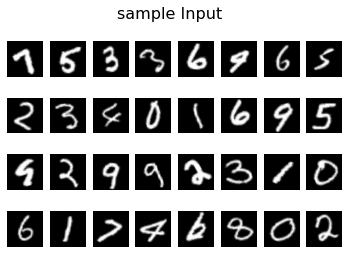

In [28]:
# images checking and preview
fig,ax = plt.subplots(4,8)
images, labels = next(iter(train_loader))


for index,img in enumerate(images):
    img = np.transpose(img, axes= (1,2,0))
    img = np.squeeze(img.numpy(), axis=2)
    ax[index//8][index%8].imshow(img, cmap='gray')
    ax[index//8][index%8].axis('off')

fig.suptitle('sample Input', fontsize=16)

# plt.imshow(img, cmap='gray')
